# Plotting
---
This is an introduction to reading, manipulating, and writing tabular data in python, focussing on the dataframe - the most common way to handle tabular data.

By the end you will:
- Learn how to read (and write) in excel and csv formats
- Inspect dataframes
- Subset dataframes

## Import packages

The dataframe is actually not native to python, it belongs to a python package called pandas.

We have to make our notebook aware of any packages we want to use by 'importing' them

In [10]:
import os # operating system: for interacting with files
import pandas as pd # key tabular data package in python
import numpy as np # important package for mathematics in python
from matplotlib import pyplot as plt # a common plotting package
import seaborn as sns # another common plotting package

## Reading data into dataframes

In this example our data is stored as a CSV file (Comma-Separated Values).

This is a simple way to store and organize data in a plain text format.

It’s like a spreadsheet but without all the extra features of software like Excel or Google Sheets.

How a CSV File Works:
 - It contains rows and columns, just like a table.
 - Each row represents a record (or an entry).
 - Each column contains a specific type of information (like a name, date, or price).
 - The values in each row are separated by commas (,), which is why it’s called Comma-Separated Values.

These data are from: _Machine learning has been used to predict patient survival based on key clinical parameters_ [Chicco & Jurman, 2020](https://doi.org/10.1186/s12911-020-1023-5).

We read in the csv file into a **pandas dataframe** called hf_prediction_data.

We will use the `hf_prediction_data_time_removed` dataframe from earlier to demonstrate plotting

In [3]:
input_file_path = "./data/heart_failure_clinical_records_dataset.csv" # define the relative path to the file
hf_prediction_data = pd.read_csv(input_file_path) # read in the csv file using pandas built-in csv reading function

## Manipulating dataframes

In [4]:
# We can inspect the data
hf_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We can see the table has 12 columns and 299 rows. The Dtype indicates the data are either integers (int64) or non-integer numbers (float64)

In [5]:
hf_prediction_data.head() # the head() method shows us the top

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


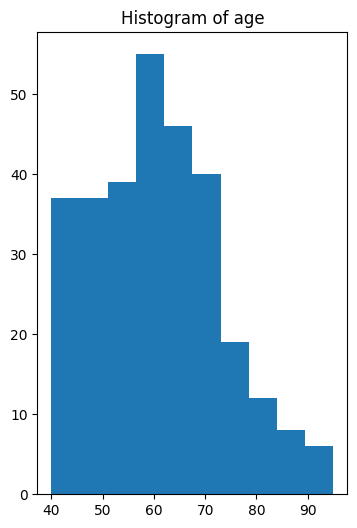

In [6]:
# Histograms are useful ways to explore data
plt.figure(figsize=(4,6))
plt.hist(x=hf_prediction_data['age']) # we pass the histogram function a single column of data
plt.title("Histogram of age")
plt.show()

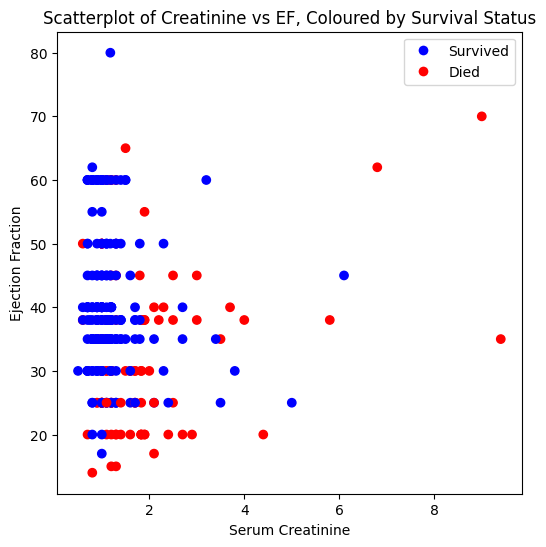

In [7]:
# Scatterplots can help visualise 2 continuous variables

# Define colors for the two classes (0 = survived, 1 = died)
colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(6,6))
scatter = plt.scatter(x=hf_prediction_data['serum_creatinine'],
                      y=hf_prediction_data['ejection_fraction'],
                      c=hf_prediction_data['DEATH_EVENT'].map(colors),  # Map colors
                      label='Survival Status')

plt.xlabel("Serum Creatinine")
plt.ylabel("Ejection Fraction")
plt.title("Scatterplot of Creatinine vs EF, Coloured by Survival Status")

# Manually create legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='blue', label='Survived'),
    plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='red', label='Died')
])

plt.show()